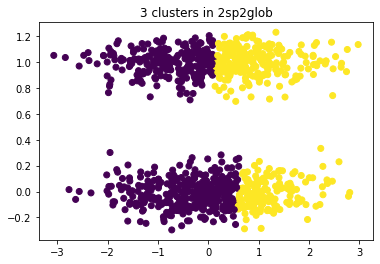

In [30]:
from sklearn.cluster import AgglomerativeClustering
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt

### 2 Clustering aggloméré

# Charge le jeu de donnée : 2sp2glob
data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/2sp2glob.arff','r'))[0]
# Garde uniquement les 2 premières colonnes du jeu de donnée
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
# Transforme la liste de donnée en une liste de liste utilisable par numpy
npliste = np.array([x for x in liste])

# Calcul les clusters pour le nombre attendus de cluster
pred = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward',connectivity=None).fit_predict(npliste)

# Affiche le résultat de la clusterisation
#plt.figure(figsize=(10, 10))
plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.title("3 clusters in 2sp2glob")
plt.show()


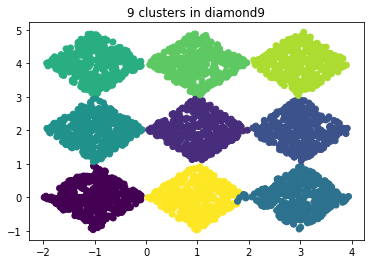

In [21]:
from sklearn.cluster import AgglomerativeClustering

### 2 Clustering k-means (suite)

# Charge le jeu de donnée : diamond9
data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/diamond9.arff','r'))[0]
# Garde uniquement les 2 premières colonnes du jeu de donnée
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
# Transforme la liste de donnée en une liste de liste utilisable par numpy
npliste = np.array([x for x in liste])

# Calcul les clusters pour le nombre attendus de cluster
pred = AgglomerativeClustering(n_clusters=9, affinity='euclidean',linkage='ward',connectivity=None).fit_predict(npliste)

# Affiche le résultat de la clusterisation
#plt.figure(figsize=(10, 10))
plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.title("9 clusters in diamond9")
plt.show()


Mesures : [0.352, 0.382, 0.387, 0.408, 0.411, 0.446, 0.494, 0.548, 0.517, 0.489, 0.456]
Temps : [0.117, 0.119, 0.122, 0.193, 0.138, 0.141, 0.134, 0.137, 0.133, 0.136, 0.133]
Clusters :  9


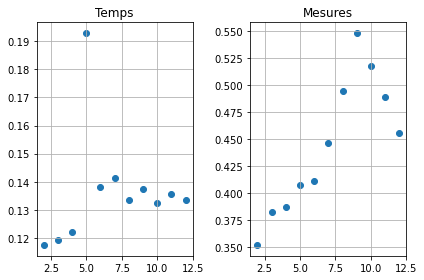

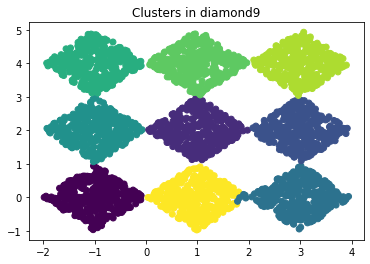

In [23]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
import time

### 2 Clustering aggloméré (metrics)

### Charge le jeu de donnée : diamond9
data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/diamond9.arff','r'))[0]
### Garde uniquement les 2 premières colonnes du jeu de donnée
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
### Transforme la liste de donnée en une liste de liste utilisable par numpy
npliste = np.array([x for x in liste])

### Calcule les Silhouette-score et les temps d'exécution pour 2 à 13 clusters
temps = []
mesures = []
nb_clusters = range(2, 13)
for i in nb_clusters:
    t1 = time.time()
    ### Appel de la méthode de clusterization
    model = AgglomerativeClustering(n_clusters=i, affinity='euclidean',linkage='ward',connectivity=None).fit(npliste)
    t2 = time.time()
    labels = model.labels_
    mesure = metrics.silhouette_score(npliste, labels, metric='euclidean')
    temps += [t2-t1]
    mesures += [mesure]

print("Mesures :",[round(num, 3) for num in mesures])
print("Temps :",[round(num, 3) for num in temps])

### Trouve le nombre de cluster maximisant Silhouette-Score
nb_cluster_max_score = mesures.index(max(mesures))+2
print("Clusters : ",nb_cluster_max_score)

### Affiche les résultats 
### Graphes des metrics
fig, figs = plt.subplots(nrows=1, ncols=2)
figs[0].scatter(nb_clusters, temps)
figs[0].grid()
figs[0].title.set_text('Temps')
figs[1].scatter(nb_clusters, mesures)
figs[1].grid()
figs[1].title.set_text('Mesures')
fig.tight_layout()

### Calcule les clusters pour le nombre maximisant le Silhouette-Score
### Appel de la méthode de clusterization
pred = AgglomerativeClustering(n_clusters=nb_cluster_max_score, affinity='euclidean',linkage='ward',connectivity=None).fit_predict(npliste)
### Affiche la clusterisations
#plt.figure(figsize=(10, 10))
plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.title("Clusters in diamond9")
plt.show()


In [57]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
import time
import os

### 2 Clustering aggloméré (metrics)

def metricsandclusterisationof(name):
    path = './clustering-benchmark-master/src/main/resources/datasets/artificial/'
    file_path = path + name + '.arff'
    ### Charge le jeu de donnée
    data = arff.loadarff(open(file_path,'r'))[0]
    ### Garde uniquement les 2 premières colonnes du jeu de donnée
    liste = []
    for i in range(0, len(data)-1):
        liste += [[data[i][0],data[i][1]]]
    ### Transforme la liste de donnée en une liste de liste utilisable par numpy
    npliste = np.array([x for x in liste])

    ### Calcule les Silhouette-score et les temps d'exécution pour 2 à 13 clusters
    temps = []
    mesures = []
    nb_clusters = range(2, 20)
    for i in nb_clusters:
        t1 = time.time()
        ### Appel de la méthode de clusterization
        model = AgglomerativeClustering(n_clusters=i, affinity='euclidean',linkage='single',connectivity=None).fit(npliste)
        t2 = time.time()
        labels = model.labels_
        mesure = metrics.silhouette_score(npliste, labels, metric='euclidean')
        temps += [t2-t1]
        mesures += [mesure]

    print("Mesures :",[round(num, 3) for num in mesures])
    print("Temps :",[round(num, 3) for num in temps])

    ### Trouve le nombre de cluster maximisant Silhouette-Score
    nb_cluster_max_score = mesures.index(max(mesures))+2
    print("Clusters : ",nb_cluster_max_score)

    ### Affiche les résultats 
    ### Graphes des metrics
    fig, figs = plt.subplots(nrows=1, ncols=2)
    figs[0].scatter(nb_clusters, temps)
    figs[0].grid()
    figs[0].title.set_text('Temps')
    figs[1].scatter(nb_clusters, mesures)
    figs[1].grid()
    figs[1].title.set_text('Mesures')
    fig.tight_layout()

    ### Calcule les clusters pour le nombre maximisant le Silhouette-Score
    ### Appel de la méthode de clusterization
    pred = AgglomerativeClustering(n_clusters=nb_cluster_max_score, affinity='euclidean',linkage='ward',connectivity=None).fit_predict(npliste)
    ### Affiche la clusterisations
    #plt.figure(figsize=(10, 10))
    plt.figure()
    plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
    cluster_name = "Clusters in " + name
    plt.title(cluster_name)
    plt.show()

In [ ]:
l=os.listdir('./clustering-benchmark-master/src/main/resources/datasets/artificial/')
li=[i for i in l if 'arff' in i]
lis=[x.split('.')[0] for x in l]
for i in lis:
    try:
        metricsandclusterisationof(i)
    except Exception:
        pass

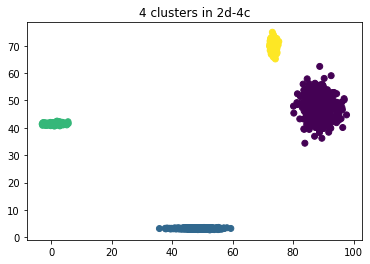

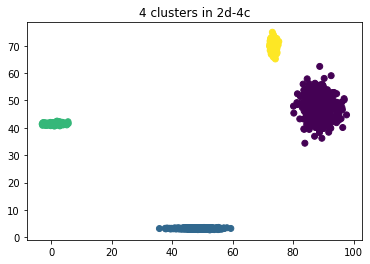

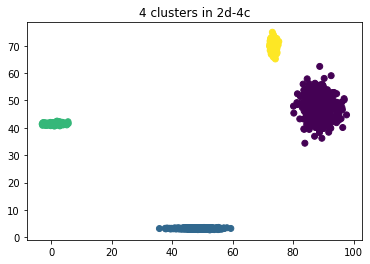

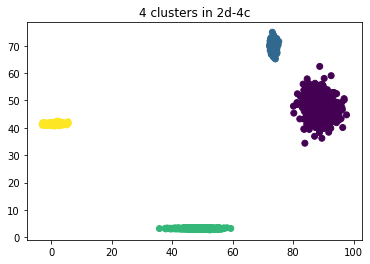

Mesures : [0.56, 0.867, 0.867, 0.782, 0.733, 0.69, 0.641, 0.628, 0.612, 0.597, 0.592, 0.59, 0.575, 0.461, 0.461, 0.455, 0.44, 0.439]
Temps : [0.007, 0.007, 0.007, 0.008, 0.008, 0.008, 0.01, 0.008, 0.007, 0.01, 0.009, 0.008, 0.009, 0.007, 0.007, 0.007, 0.007, 0.008]
Clusters :  4


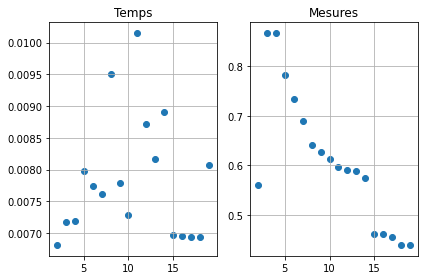

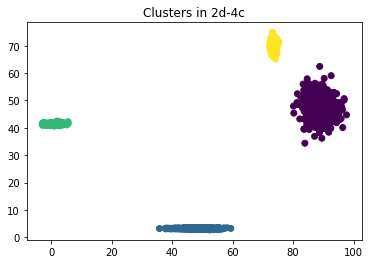

In [63]:
# Charge le jeu de donnée : 2d-4c
data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/2d-4c.arff','r'))[0]
# Garde uniquement les 2 premières colonnes du jeu de donnée
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
# Transforme la liste de donnée en une liste de liste utilisable par numpy
npliste = np.array([x for x in liste])

# Calcul les clusters pour le nombre attendus de cluster
pred1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='ward',connectivity=None).fit_predict(npliste)
pred2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='complete',connectivity=None).fit_predict(npliste)
pred3 = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='average',connectivity=None).fit_predict(npliste)
pred4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='single',connectivity=None).fit_predict(npliste)


# Affiche le résultat de la clusterisation
plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred1)
plt.title("4 clusters in 2d-4c")
plt.show()

plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred2)
plt.title("4 clusters in 2d-4c")
plt.show()

plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred3)
plt.title("4 clusters in 2d-4c")
plt.show()

plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred4)
plt.title("4 clusters in 2d-4c")
plt.show()

metricsandclusterisationof("2d-4c")

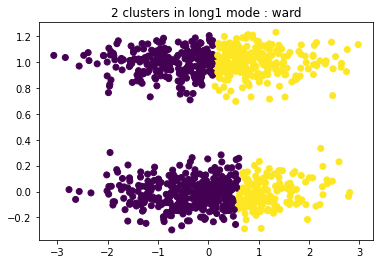

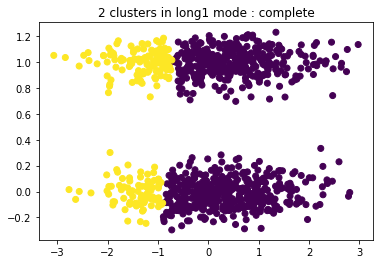

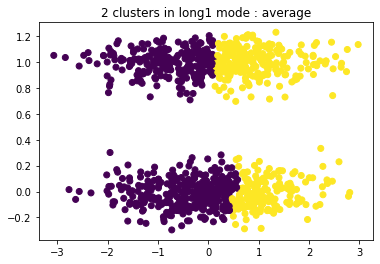

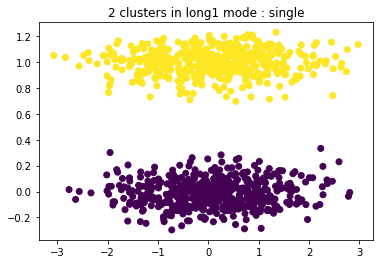

Mesures : [0.291, 0.248, 0.201, 0.202, 0.182, 0.179, 0.173, 0.152, 0.149, 0.143, 0.096, 0.103, 0.113, -0.013, -0.012, -0.001, -0.002, -0.007]
Temps : [0.005, 0.005, 0.005, 0.005, 0.006, 0.006, 0.006, 0.006, 0.005, 0.005, 0.006, 0.008, 0.006, 0.005, 0.005, 0.005, 0.005, 0.005]
Clusters :  2


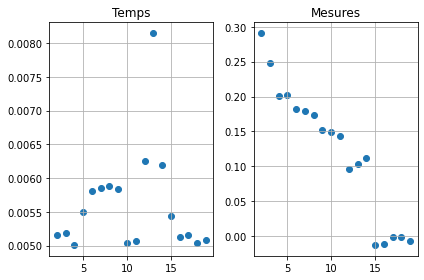

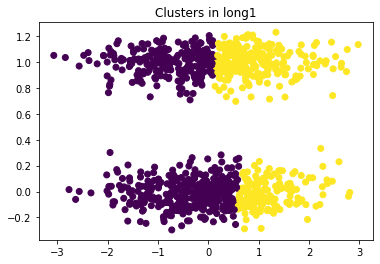

In [62]:
# Charge le jeu de donnée : long1
data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/long1.arff','r'))[0]
# Garde uniquement les 2 premières colonnes du jeu de donnée
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
# Transforme la liste de donnée en une liste de liste utilisable par numpy
npliste = np.array([x for x in liste])

# Calcul les clusters pour le nombre attendus de cluster
pred1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward',connectivity=None).fit_predict(npliste)
pred2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='complete',connectivity=None).fit_predict(npliste)
pred3 = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='average',connectivity=None).fit_predict(npliste)
pred4 = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='single',connectivity=None).fit_predict(npliste)


# Affiche le résultat de la clusterisation
plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred1)
plt.title("2 clusters in long1 mode : ward")
plt.show()

plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred2)
plt.title("2 clusters in long1 mode : complete")
plt.show()

plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred3)
plt.title("2 clusters in long1 mode : average")
plt.show()

plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred4)
plt.title("2 clusters in long1 mode : single")
plt.show()

metricsandclusterisationof("long1")

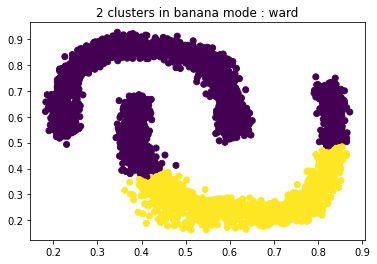

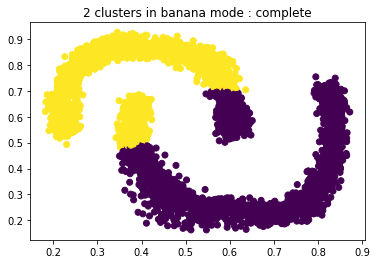

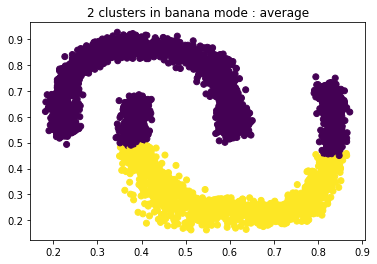

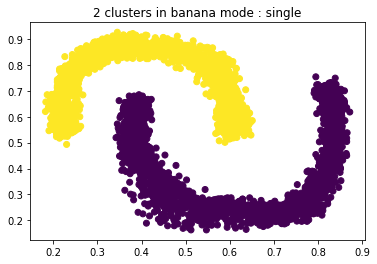

Mesures : [0.367, 0.074, 0.008, -0.106, -0.109, -0.211, -0.214, -0.221, -0.222, -0.234, -0.412, -0.455, -0.53, -0.569, -0.569, -0.571, -0.571, -0.571]
Temps : [0.073, 0.073, 0.076, 0.074, 0.076, 0.076, 0.074, 0.076, 0.072, 0.076, 0.079, 0.071, 0.073, 0.071, 0.077, 0.076, 0.071, 0.071]
Clusters :  2


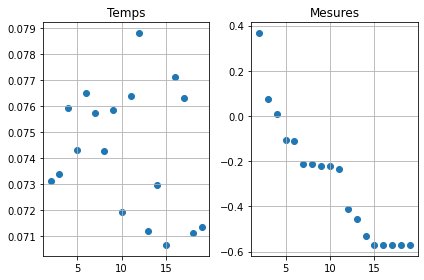

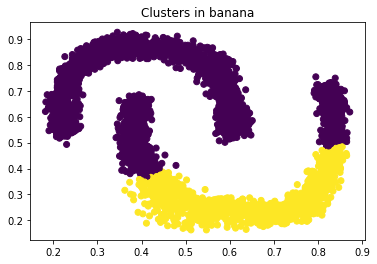

In [60]:
# Charge le jeu de donnée : banana
data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/banana.arff','r'))[0]
# Garde uniquement les 2 premières colonnes du jeu de donnée
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
# Transforme la liste de donnée en une liste de liste utilisable par numpy
npliste = np.array([x for x in liste])

# Calcul les clusters pour le nombre attendus de cluster
pred1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward',connectivity=None).fit_predict(npliste)
pred2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='complete',connectivity=None).fit_predict(npliste)
pred3 = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='average',connectivity=None).fit_predict(npliste)
pred4 = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='single',connectivity=None).fit_predict(npliste)


# Affiche le résultat de la clusterisation
plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred1)
plt.title("2 clusters in banana mode : ward")
plt.show()

plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred2)
plt.title("2 clusters in banana mode : complete")
plt.show()

plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred3)
plt.title("2 clusters in banana mode : average")
plt.show()

plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred4)
plt.title("2 clusters in banana mode : single")
plt.show()

metricsandclusterisationof("banana")

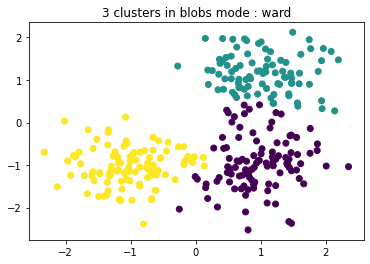

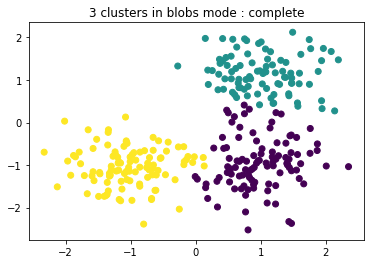

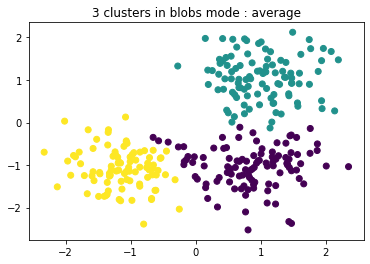

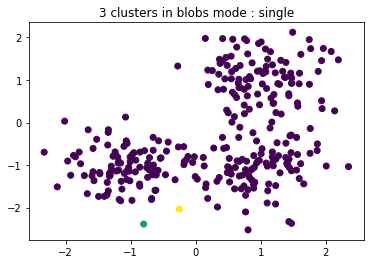

Mesures : [0.135, -0.005, -0.243, -0.274, -0.272, -0.308, -0.311, -0.331, -0.358, -0.396, -0.441, -0.456, -0.462, -0.479, -0.493, -0.459, -0.455, -0.199]
Temps : [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
Clusters :  2


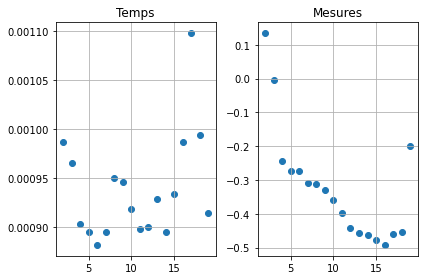

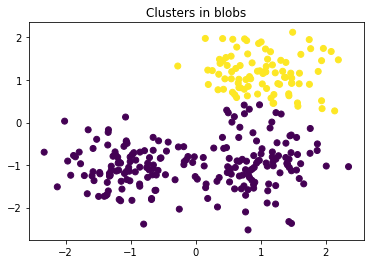

In [61]:
# Charge le jeu de donnée : blobs
data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/blobs.arff','r'))[0]
# Garde uniquement les 2 premières colonnes du jeu de donnée
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
# Transforme la liste de donnée en une liste de liste utilisable par numpy
npliste = np.array([x for x in liste])

# Calcul les clusters pour le nombre attendus de cluster
pred1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward',connectivity=None).fit_predict(npliste)
pred2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='complete',connectivity=None).fit_predict(npliste)
pred3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='average',connectivity=None).fit_predict(npliste)
pred4 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='single',connectivity=None).fit_predict(npliste)


# Affiche le résultat de la clusterisation
plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred1)
plt.title("3 clusters in blobs mode : ward")
plt.show()

plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred2)
plt.title("3 clusters in blobs mode : complete")
plt.show()

plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred3)
plt.title("3 clusters in blobs mode : average")
plt.show()

plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred4)
plt.title("3 clusters in blobs mode : single")
plt.show()

metricsandclusterisationof("blobs")